In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [39]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

## Perform API Calls

In [40]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

#Create lists for stored values
latitude =[]
temperature =[]
humidity =[]
wind_speed =[]
cloudiness =[]

#Test json to help locate items
response = requests.get(url + '&q=' + cities[0]).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 52.43, 'lon': 20.72},
 'dt': 1535045400,
 'id': 763556,
 'main': {'humidity': 60,
          'pressure': 1012,
          'temp': 75.2,
          'temp_max': 75.2,
          'temp_min': 75.2},
 'name': 'Nowy Dwor Mazowiecki',
 'sys': {'country': 'PL',
         'id': 5374,
         'message': 0.0034,
         'sunrise': 1534995244,
         'sunset': 1535046237,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 140, 'speed': 6.93}}


In [41]:
#Create loop to request info for each city
c = 1
for city in cities:
    query_url = url + '&q=' + city
    response = requests.get(query_url).json()
    
    #Status Message
    print(f'Getting info for city {c}: {city}')
    c= c + 1
    
    #Append lists with information
    try:
        latitude.append(response['coord']['lat'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        
    #Many cities weren't pulling from openweather. Created error message for those cases.
    except:
        print(f'ERROR: Could not find {city}. Skipping.')

#Print completion message with number of valid cities pulled.
print(f'Query Complete. {len(latitude)} valid cities found.')

Getting info for city 1: nowy dwor mazowiecki
Getting info for city 2: tasiilaq
Getting info for city 3: hobart
Getting info for city 4: mar del plata
Getting info for city 5: bambanglipuro
Getting info for city 6: tuktoyaktuk
Getting info for city 7: tutoia
Getting info for city 8: bani
Getting info for city 9: bluff
Getting info for city 10: hermanus
Getting info for city 11: bengkulu
ERROR: Could not find bengkulu. Skipping.
Getting info for city 12: albany
Getting info for city 13: nizhneyansk
ERROR: Could not find nizhneyansk. Skipping.
Getting info for city 14: husavik
Getting info for city 15: provideniya
Getting info for city 16: jaciara
Getting info for city 17: hibbing
Getting info for city 18: alice springs
Getting info for city 19: lorengau
Getting info for city 20: karratha
Getting info for city 21: deputatskiy
Getting info for city 22: kotaparh
Getting info for city 23: tsiroanomandidy
Getting info for city 24: santa isabel do rio negro
Getting info for city 25: nikolskoy

Getting info for city 205: kamen-rybolov
Getting info for city 206: burnie
Getting info for city 207: guerrero negro
Getting info for city 208: kaka
Getting info for city 209: ribeira grande
Getting info for city 210: severo-kurilsk
Getting info for city 211: albury
Getting info for city 212: le port
Getting info for city 213: jiangkou
Getting info for city 214: bonthe
Getting info for city 215: narsaq
Getting info for city 216: sisimiut
Getting info for city 217: saint anthony
Getting info for city 218: chara
Getting info for city 219: ayan
Getting info for city 220: la ronge
Getting info for city 221: georgetown
Getting info for city 222: pecos
Getting info for city 223: pryozerne
Getting info for city 224: imbituba
Getting info for city 225: borogontsy
Getting info for city 226: sibolga
Getting info for city 227: belle glade
Getting info for city 228: belyy yar
Getting info for city 229: norman wells
Getting info for city 230: chokurdakh
Getting info for city 231: ngoro
Getting info

Getting info for city 409: kalmunai
Getting info for city 410: sentyabrskiy
ERROR: Could not find sentyabrskiy. Skipping.
Getting info for city 411: challans
Getting info for city 412: bereda
Getting info for city 413: bilma
Getting info for city 414: concordia
Getting info for city 415: dodola
Getting info for city 416: hihifo
ERROR: Could not find hihifo. Skipping.
Getting info for city 417: inuvik
Getting info for city 418: grand river south east
ERROR: Could not find grand river south east. Skipping.
Getting info for city 419: jaca
Getting info for city 420: carnot
Getting info for city 421: bodhan
Getting info for city 422: great yarmouth
Getting info for city 423: mugla
Getting info for city 424: mayo
Getting info for city 425: taicheng
Getting info for city 426: hohhot
Getting info for city 427: half moon bay
Getting info for city 428: ardrishaig
Getting info for city 429: berlevag
Getting info for city 430: mubi
Getting info for city 431: vila franca do campo
Getting info for c

## Plotting Results

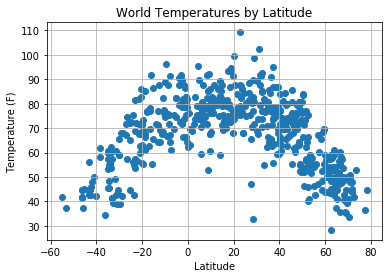

In [52]:
#Create temperature plot.
plt.scatter(latitude,temperature)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('World Temperatures by Latitude')
plt.show()

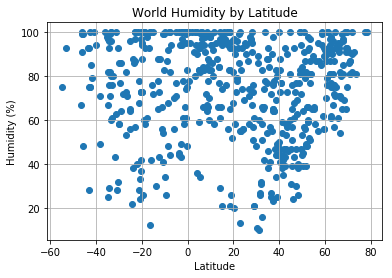

In [53]:
#Create humidity plot.
plt.scatter(latitude,humidity)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('World Humidity by Latitude')
plt.show()

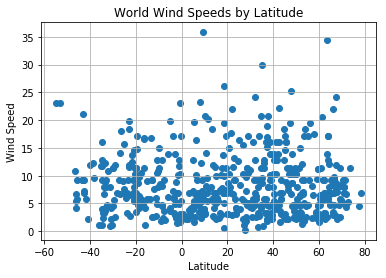

In [54]:
#Create wind speed plot.
plt.scatter(latitude,wind_speed)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('World Wind Speeds by Latitude')
plt.show()

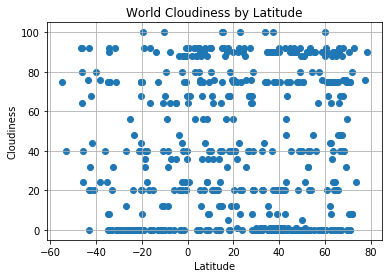

In [55]:
#Create cloudiness plot.
plt.scatter(latitude,cloudiness)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('World Cloudiness by Latitude')
plt.show()